# Individual Assignment 2: Evaluating Linear Models (Happiness Data)



[Download the 2022 World Happiness Report data here](https://docs.google.com/spreadsheets/d/1IfRlUwQDS800md3tiMPyhUr9RMawQZah/edit?usp=sharing&ouid=115523639675710586183&rtpof=true&sd=true), drag onto your Google Drive, mount your Drive, then read the dataframe as `df`. Then...

Read more here:
* https://worldhappiness.report/ed/2022/
* https://worldhappiness.report/ed/2022/#appendices-and-data

10 pts each.
* Q1) Select rows where Year is equal to 2021 (edited 9/18/2022 - thanks Javier!) only. Name it `df`. Use this subset for the rest of the assignment.
* Q2) View and count how many rows have missing values, then drop any rows with missing values. What do these rows have in common (if anything)?
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Country` column.
* Q5) Which countries are happiest? Which are the saddest? Top 10 highest and lowest happinness (df['Life Ladder']).
* Q6) Make a new dataframe called `X` that subsets the `Log GDP per capita` through and including `Confidence in national government`.
* Q7) Subset `df['LifeLadder`] from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition. Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.
* Ql0) This one is more involved but it's really important. Only worth ten points so give it a shot. This would make a great exam or technical interview question - we can discuss during the hybrid class! Write your own ten-fold cross-validation on X_train with a for loop (just like we did in class.) Apply the model each of the ten times to the X_test partition (once for each fold). Store your results efficiently in the for loop! Calculate mean absolute error for each fold and application of the model to X_test. Make a scatterplot of actual vs. predicted values for each fold and for each application of the model to X_test with nice axis labels, titles and markers. Were your results consistent among all of the folds and on X_test? Did your model quality decrease or remain fairly consistent?

Please use nice subheaders/titles so that your code is easy to grade. For example Q1 should be in the subtitle for Q1.

![picture](https://www.hrzone.com/sites/default/files/styles/inline_banner/public/dzyuba.jpg?itok=7N6UZUau)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_full_dataset = pd.read_csv('/content/drive/MyDrive/DS Using Python/Assignment data/DataForTable2.1.csv')
df_full_dataset

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


In [ ]:
df_full_dataset.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [ ]:
df_full_dataset.shape

(2089, 12)

# Q1) Select rows where Year is equal to 2021 (edited 9/18/2022 - thanks Javier!) only. Name it df. Use this subset for the rest of the assignment.

In [ ]:
df = df_full_dataset[df_full_dataset['year'] == 2021]  #the dataframe with the records corresponding to year 2021
print('The Shape of the dataset is', df.shape) #Print the shape of the new dataframe
df.head(n=10) ## Preview the 10 rows of the new dataframe

The Shape of the dataset is (119, 12)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
12,Afghanistan,2021,2.436034,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226
100,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459
183,Benin,2021,4.493431,8.140854,0.435524,56.099998,0.724062,-0.013508,0.612547,0.596801,0.434595,0.762416
202,Bolivia,2021,5.568624,9.007940,0.797810,63.599998,0.861731,-0.054499,0.812174,0.721002,0.403487,0.385876
216,Bosnia and Herzegovina,2021,5.748823,9.627625,0.859954,67.300003,0.758979,0.281281,0.920914,0.604093,0.305352,0.225853


# Q2) View and count how many rows have missing values, then drop any rows with missing values. What do these rows have in common (if anything)?

In [ ]:
df.info() # Print information about the DataFrame df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 12 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       119 non-null    object 
 1   year                               119 non-null    int64  
 2   Life Ladder                        119 non-null    float64
 3   Log GDP per capita                 111 non-null    float64
 4   Social support                     119 non-null    float64
 5   Healthy life expectancy at birth   116 non-null    float64
 6   Freedom to make life choices       118 non-null    float64
 7   Generosity                         111 non-null    float64
 8   Perceptions of corruption          116 non-null    float64
 9   Positive affect                    119 non-null    float64
 10  Negative affect                    119 non-null    float64
 11  Confidence in national government  108 non-null    float

In [ ]:
df.columns # Print the column names of the dataframe

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [ ]:

# print the number of null values per column in the df dataframe
print('The number of missing values per column:')
print(df.isna().sum())
# drop all the rows with null values from the df dataframe
df = df.dropna()


The number of missing values per column:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    8
Social support                        0
Healthy life expectancy at birth      3
Freedom to make life choices          1
Generosity                            8
Perceptions of corruption             3
Positive affect                       0
Negative affect                       0
Confidence in national government    11
dtype: int64


In [ ]:
# Calculate and print the sum of missing values in df
print('The number of missing values after dropping them per column:')
print(df.isna().sum())


The number of missing values after dropping them per column:
Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption            0
Positive affect                      0
Negative affect                      0
Confidence in national government    0
dtype: int64


In [ ]:
print('The shape of the dataset after dropping the missing values:', df.shape)
print('The one thing common in all columns are that the values are float values')

The shape of the dataset after dropping the missing values: (100, 12)
The one thing common in all columns are that the values are float values


# Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.

In [ ]:
df.head(n=10) # Preview the 10 rows of the dataframe

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226
100,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459
183,Benin,2021,4.493431,8.140854,0.435524,56.099998,0.724062,-0.013508,0.612547,0.596801,0.434595,0.762416
202,Bolivia,2021,5.568624,9.007940,0.797810,63.599998,0.861731,-0.054499,0.812174,0.721002,0.403487,0.385876
216,Bosnia and Herzegovina,2021,5.748823,9.627625,0.859954,67.300003,0.758979,0.281281,0.920914,0.604093,0.305352,0.225853
244,Brazil,2021,6.009953,9.593187,0.814329,65.750000,0.791508,0.090771,0.738571,0.661550,0.407183,0.327099
257,Bulgaria,2021,5.421693,10.054126,0.883621,66.500000,0.841188,-0.010517,0.891248,0.646760,0.252777,0.224526


In [ ]:
df.info() # Print information about the DataFrame "df"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       100 non-null    object 
 1   year                               100 non-null    int64  
 2   Life Ladder                        100 non-null    float64
 3   Log GDP per capita                 100 non-null    float64
 4   Social support                     100 non-null    float64
 5   Healthy life expectancy at birth   100 non-null    float64
 6   Freedom to make life choices       100 non-null    float64
 7   Generosity                         100 non-null    float64
 8   Perceptions of corruption          100 non-null    float64
 9   Positive affect                    100 non-null    float64
 10  Negative affect                    100 non-null    float64
 11  Confidence in national government  100 non-null    float

# Q4) Count how many unique values are in the Country column.

In [ ]:
print('The number of Unique values in the Country column are:',df['Country name'].nunique()) # Prints the number of unique countries from the 'Country name' column of the dataframe df_year_2021

The number of Unique values in the Country column are: 100


In [ ]:
print('The unique values in the Country column are:')
print(df['Country name'].unique()) # Prints the list of unique countries from the 'Country name' column of the dataframe df_year_2021


The unique values in the Country column are:
['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Cameroon'
 'Canada' 'Chile' 'Colombia' 'Congo (Brazzaville)' 'Costa Rica' 'Croatia'
 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lithuania' 'Malawi'
 'Mali' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua' 'Nigeria'
 'North Macedonia' 'Norway' 'Panama' 'Paraguay' 'Peru' 'Philippines'
 'Poland' 'Portugal' 'Romania' 'Russia' 'Senegal' 'Serbia' 'Sierra Leone'
 'Slovakia' 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka'
 'Sweden' 'Switzerla

# Q5) Which countries are happiest? Which are the saddest? Top 10 highest and lowest happinness (df['Life Ladder']).

In [ ]:
df_LifeLadder = df.sort_values(by =  ['Life Ladder'], ascending = False) # Sort the dataframe df_year_2021 by column 'Life Ladder' in descending order
print(df_LifeLadder['Life Ladder'].iloc[0:10]) # Print the top 10 values of the column 'Life Ladder'

601     7.794378
492     7.698747
872     7.577528
782     7.564625
1770    7.439280
1404    7.361574
1781    7.327672
1313    7.314151
1328    7.136701
86      7.111599
Name: Life Ladder, dtype: float64


In [ ]:
print(df_LifeLadder['Life Ladder'].iloc[-11:-1]) # Print the last 10 values of the 'Life Ladder' column in the 'df_LifeLadder' dataframe

1748    4.103447
1860    4.036544
544     4.025748
938     3.909149
1633    3.714294
1834    3.680568
1123    3.635283
798     3.558254
2088    3.154578
2072    3.082155
Name: Life Ladder, dtype: float64


# Q6) Make a new dataframe called X that subsets the Log GDP per capita through and including Confidence in national government.

In [ ]:
X = df.drop(['Country name', 'year', 'Life Ladder'], axis = 1) # Drop specified columns from the df_year_2021 dataframe
X.head(10) # Display the first 10 rows of the dataframe


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
26,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
56,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
86,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226
100,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459
183,8.140854,0.435524,56.099998,0.724062,-0.013508,0.612547,0.596801,0.434595,0.762416
202,9.007940,0.797810,63.599998,0.861731,-0.054499,0.812174,0.721002,0.403487,0.385876
216,9.627625,0.859954,67.300003,0.758979,0.281281,0.920914,0.604093,0.305352,0.225853
244,9.593187,0.814329,65.750000,0.791508,0.090771,0.738571,0.661550,0.407183,0.327099
257,10.054126,0.883621,66.500000,0.841188,-0.010517,0.891248,0.646760,0.252777,0.224526







# Q7) Subset df['LifeLadder] from df and assign to a variable called y.

In [ ]:
y = df[['Life Ladder']] #assigns the Life Ladder column of the df_year_2021 dataframe to a variable called y
y.head(10) #prints the first 10 rows of the y dataframe

,Life Ladder
26,5.255482
56,5.908279
71,5.300569
86,7.111599
100,7.079641
183,4.493431
202,5.568624
216,5.748823
244,6.009953
257,5.421693


# Q8) Convert X and y to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.

In [ ]:
# Transform X and y into Numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3052984) # Split the dataset into train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Print the dimensions of the train and test sets

(80, 9) (20, 9) (80, 1) (20, 1)


In [ ]:
# Create a DataFrame from the X_train numpy array
X_train_df = pd.DataFrame(X_train)

# Check the information of the DataFrame
X_train_df.info()

# Print the total of null values in each column
print(X_train_df.isna().sum())

# Create a DataFrame from the df_year_2021 DataFrame and drop NaN values
df_clean = df.dropna()

# Check the information of the DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80 non-null     float64
 1   1       80 non-null     float64
 2   2       80 non-null     float64
 3   3       80 non-null     float64
 4   4       80 non-null     float64
 5   5       80 non-null     float64
 6   6       80 non-null     float64
 7   7       80 non-null     float64
 8   8       80 non-null     float64
dtypes: float64(9)
memory usage: 5.8 KB
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       100 non-null    object 
 1   year                               100 non-null    int64  
 2   Life La

# Q9) Fit a linear regression model. Calculate mean absolute error for each partition. Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

In [ ]:
# Scale features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the scaler
X_test = scaler.transform(X_test)

In [ ]:
# Create a Linear Regression object and fit it to our training data
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

In [ ]:
# Predictions of the trained Linear Regression model on the train and test sets
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)

**Linear Regression Metrics**


In [ ]:
# Print the R2 scores for the training and test datasets
print("The training data R2 Score:", r2_score(y_train, train_preds))
print("The test data R2 Score:", r2_score(y_test, test_preds))

The training data R2 Score: 0.8285676795439199
The test data R2 Score: 0.8425061741495189


In [ ]:
# Calculate Mean Absolute Error of the training data
trainMAE = mean_absolute_error(y_train, train_preds)

# Print the Mean Absolute Error of the training data
print("The training data Mean Absolute Error:", trainMAE)


# Calculate Mean Absolute Error of the test data
testMAE = mean_absolute_error(y_test, test_preds)

# Print the Mean Absolute Error of the test data
print("The test data Mean Absolute Error:", testMAE)


The training data Mean Absolute Error: 0.33152200941319687
The test data Mean Absolute Error: 0.39734356969456064


In [ ]:
# Calculate the mean squared error on the training data
trainMSE = mean_squared_error(y_train, train_preds)


# Print the training data mean squared error
print("The training data Mean Squared Error::", trainMSE)

# Calculate the mean squared error on the test data
testMSE = mean_squared_error(y_test, test_preds)


# Print the test data mean squared error
print("The test data Mean Squared Error:", testMSE)

The training data Mean Squared Error:: 0.20868539767886038
The test data Mean Squared Error: 0.28103765913223655


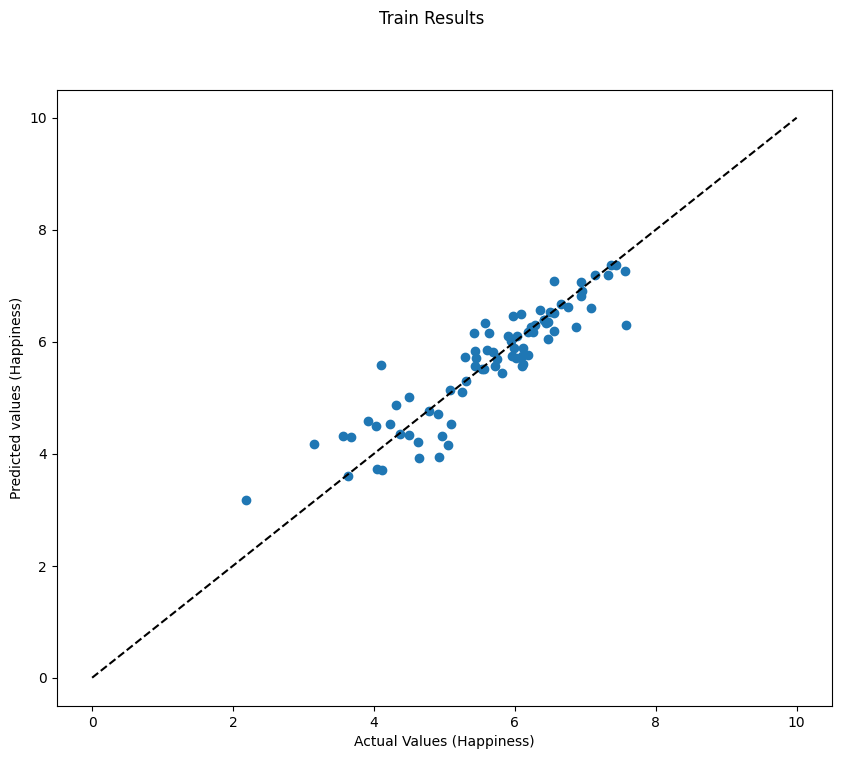

In [ ]:
plt.figure(figsize=(10, 8)) # Create a figure with size 10x8
plt.scatter(x=y_train, y=train_preds) # Create a scatter plot with the x-axis representing y_train and y-axis representing train_preds
plt.plot([0, 10], [0, 10], '--k') # Create a 45 degree line for reference
plt.xlabel('Actual Values (Happiness)') # Label x-axis with "Actual Values (Training)"
plt.ylabel('Predicted values (Happiness)') # Label y-axis with "Predicted values (Training)"
plt.suptitle('Train Results') # Set the title for the plot as "Train Results"
plt.show() # Show the plot

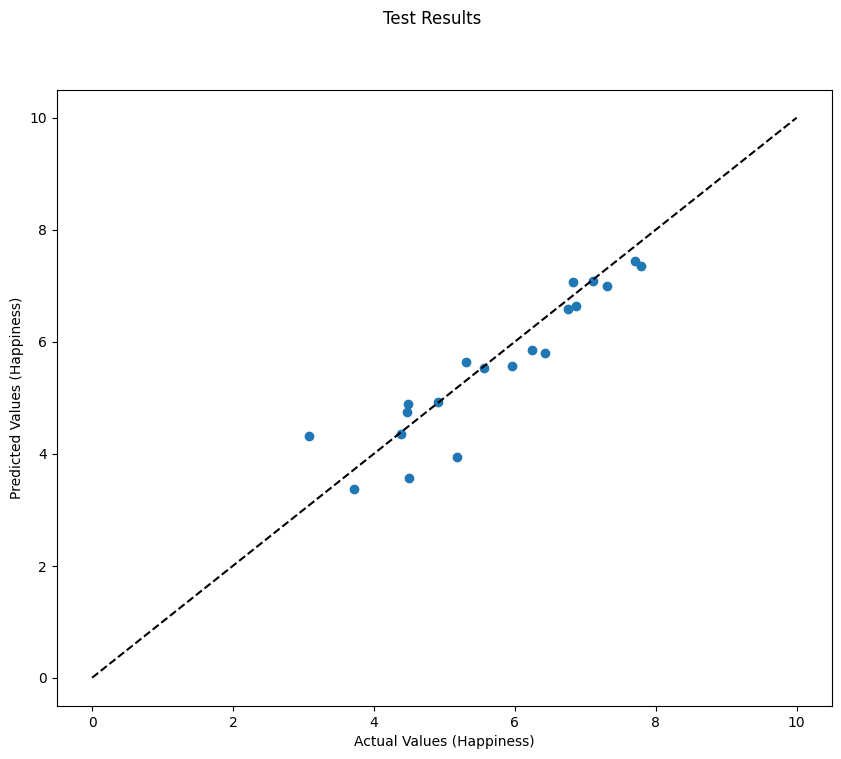

In [ ]:
plt.figure(figsize=(10, 8)) # Create a figure with a size of 10x8
plt.scatter(x=y_test, y=test_preds) # Create a scatter plot of y_test and test_preds
plt.plot([0, 10], [0, 10], '--k') # Plot a 45 degree line
plt.xlabel('Actual Values (Happiness)') # Label the x axis as Actual Values (Test)
plt.ylabel('Predicted Values (Happiness)') # Label the y axis as Predicted Values (Test)
plt.suptitle('Test Results') # Give a title to the plot
plt.show() # Show the plot

# Ql0) This one is more involved but it's really important. Only worth ten points so give it a shot. This would make a great exam or technical interview question - we can discuss during the hybrid class! Write your own ten-fold cross-validation on X_train with a for loop (just like we did in class.) Apply the model each of the ten times to the X_test partition (once for each fold). Store your results efficiently in the for loop! Calculate mean absolute error for each fold and application of the model to X_test. Make a scatterplot of actual vs. predicted values for each fold and for each application of the model to X_test with nice axis labels, titles and markers. Were your results consistent among all of the folds and on X_test? Did your model quality decrease or remain fairly consistent?

0
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 0]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


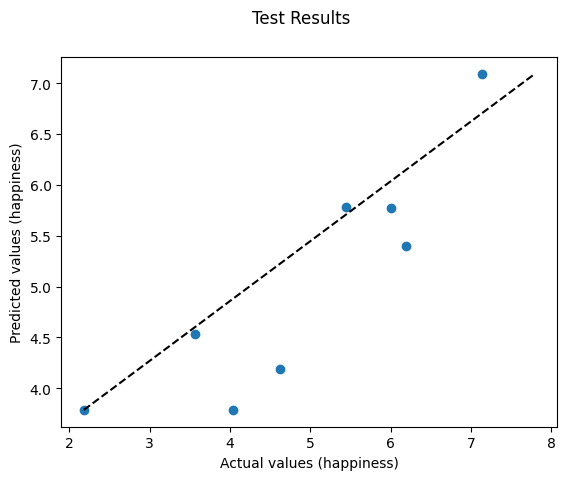

Mean Absolute Error: 0.5834297671281907
1
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 1]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


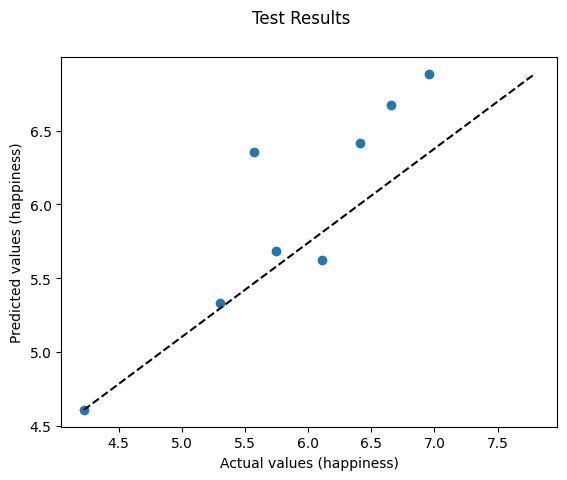

Mean Absolute Error: 0.23188044593258095
2
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 2]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


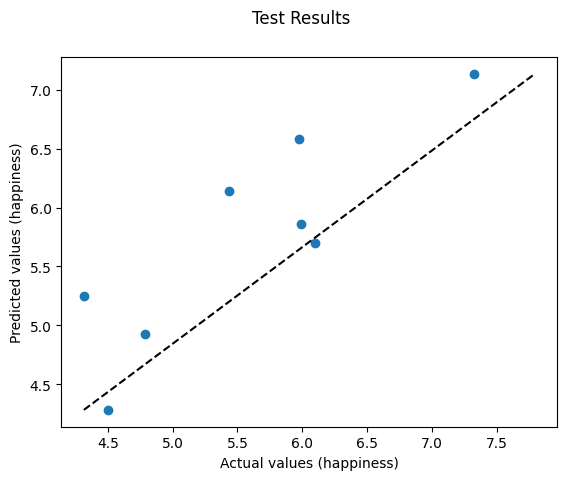

Mean Absolute Error: 0.4164098320719506
3
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 3]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


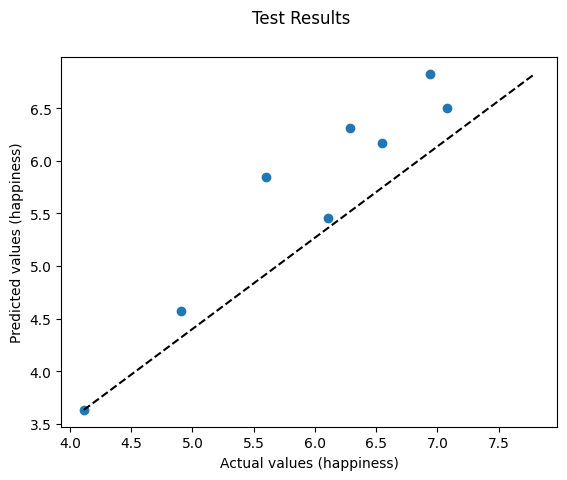

Mean Absolute Error: 0.35131026569453805
4
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 4]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


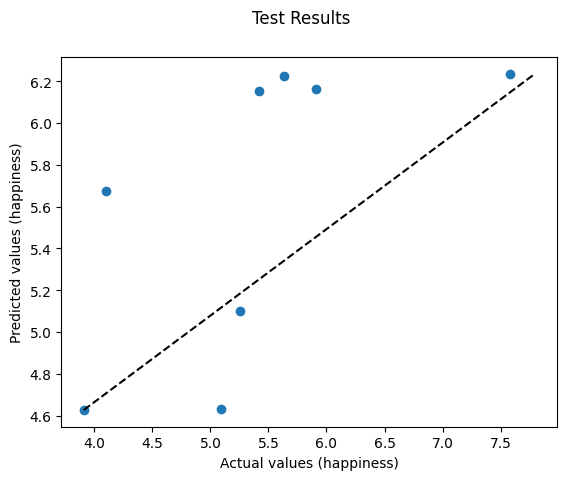

Mean Absolute Error: 0.7286151590115673
5
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 5]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


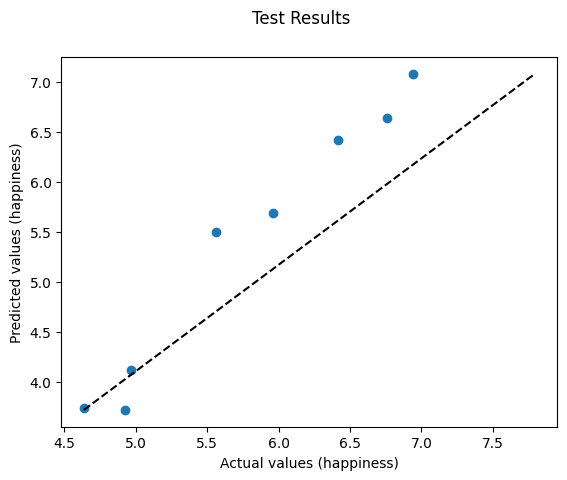

Mean Absolute Error: 0.4447561941758395
6
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 6]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


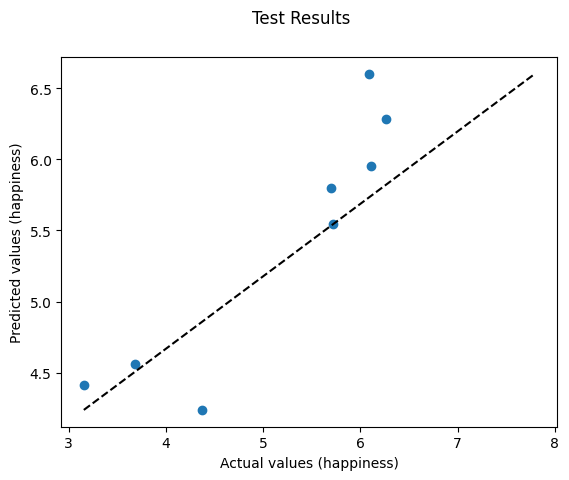

Mean Absolute Error: 0.40458617468803143
7
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 7]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


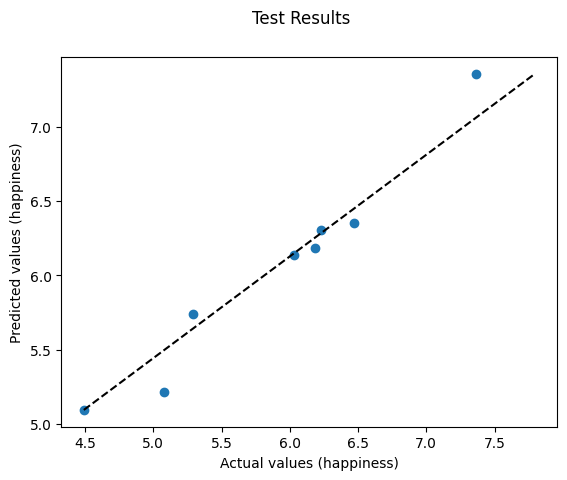

Mean Absolute Error: 0.1875638334646974
8
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 8]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


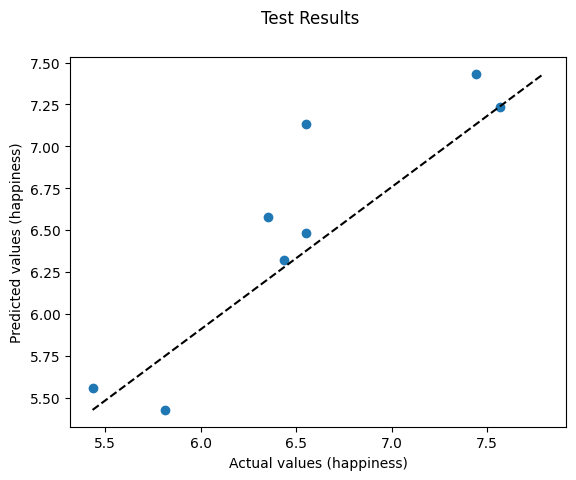

Mean Absolute Error: 0.22949358648526208
9
(8, 9)
(8, 1)
(72, 9)
(72, 1)
['Iteration(Fold): ', 9]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


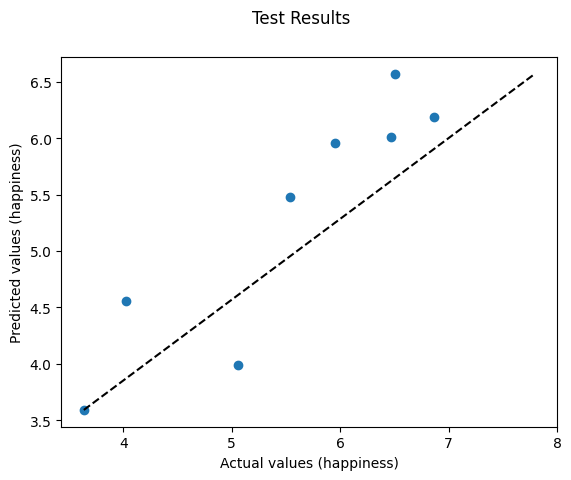

Mean Absolute Error: 0.36336575539624444


In [ ]:
from sklearn.utils import shuffle


# Convert X_train and y_train to DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

foldRange = [0,1,2,3,4,5,6,7,8,9] # Create a list of fold numbers
resultDF10=[] # Create an empty list to store the 10 results

# Shuffle the training data and labels
X_train, y_train = shuffle(X_train, y_train)

for i in foldRange: # Iterate through the folds
  print(i) # Print the fold number

  # Create the train and test splits
  model_X_test = X_train[round(i*0.1*X_train.shape[0]) : round((i+1)*0.1*X_train.shape[0])]
  print(model_X_test.shape) # Print the test split shape
  model_y_test = y_train[round(i*0.1*y_train.shape[0]) : round((i+1)*0.1*y_train.shape[0])]
  print(model_y_test.shape) # Print the test split shape

  model_X_train = X_train[~X_train.isin(model_X_test)].dropna()
  print(model_X_train.shape) # Print the train split shape
  model_y_train = y_train[~y_train.isin(model_y_test)].dropna()
  print(model_y_train.shape) # Print the train split shape


  LR = LinearRegression().fit(model_X_train, model_y_train)  # Initialize and fit a LinearRegression model

 # Making predictions on the test dataset using Linear Regression
  test_preds = LR.predict(model_X_test)

 # Calculating the mean absolute error between the predicted values and the actual target values
  test_MAE = mean_absolute_error(model_y_test, test_preds)

  resultDF10.append([i,test_MAE]) # Append the iteration and MAE to the result DataFrame
  print(["Iteration(Fold): ", i]) # Print the iteration number
  plt.scatter(x=model_y_test, y=test_preds) # Create a scatter plot of predicted values and actual values
  plt.plot([model_y_test.min(), y_test.max()], [test_preds.min(), test_preds.max()], '--k') # Plot a line of best fit
  plt.xlabel('Actual values (happiness)') # Label the x-axis
  plt.ylabel('Predicted values (happiness)') # Label the y-axis
  plt.suptitle('Test Results') # Add a title
  plt.show() # Show the plot
  print('Mean Absolute Error:', test_MAE) # Print the MAE

In [ ]:
resultDF10 = pd.DataFrame(resultDF10) # Create a new dataframe from the resultDF10
print(resultDF10) # Print the dataframe
resultDF10.columns = ['fold', 'MAEval'] # Set the columns of the dataframe to 'fold' and 'MAEval'
print('The mean of the result in every fold:', np.mean(resultDF10['MAEval'])) # Print the mean of the MAEval column
print('The standard deviation of the result in every fold:', np.std(resultDF10['MAEval'])) # Print the standard deviation of the MAEval column

   0         1
0  0  0.583430
1  1  0.231880
2  2  0.416410
3  3  0.351310
4  4  0.728615
5  5  0.444756
6  6  0.404586
7  7  0.187564
8  8  0.229494
9  9  0.363366
The mean of the result in every fold: 0.3941411014048902
The standard deviation of the result in every fold: 0.15803894211350317


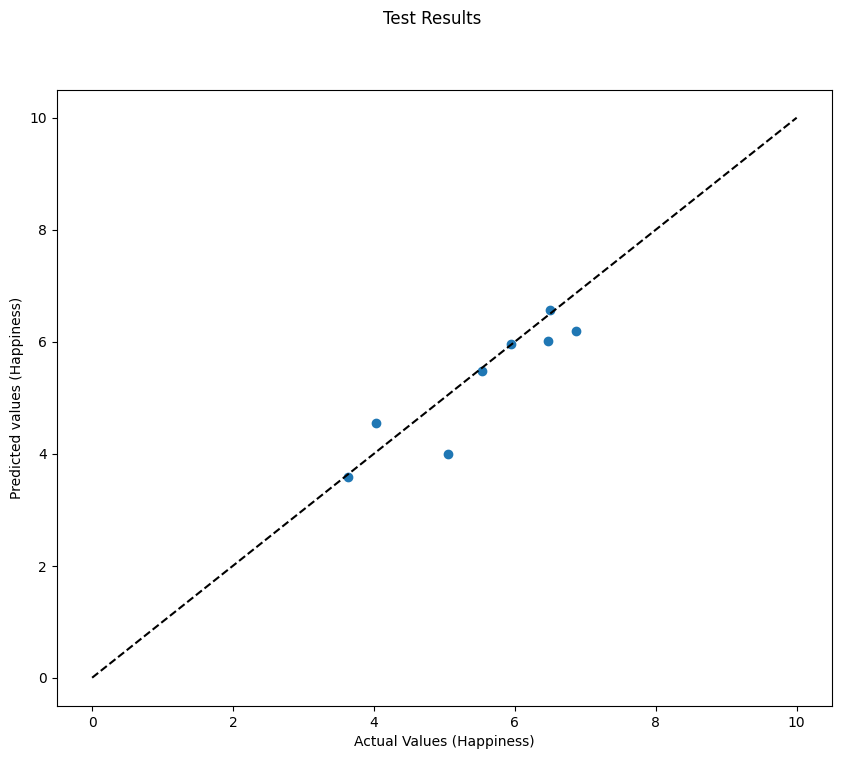

In [ ]:
plt.figure(figsize=(10, 8)) # Create a figure with size 10x8
plt.scatter(x=model_y_test, y=test_preds) # Create a scatter plot with the x-axis representing y_train and y-axis representing train_preds
plt.plot([0, 10], [0, 10], '--k') # Create a 45 degree line for reference
plt.xlabel('Actual Values (Happiness)') # Label x-axis with "Actual Values (Training)"
plt.ylabel('Predicted values (Happiness)') # Label y-axis with "Predicted values (Training)"
plt.suptitle('Test Results') # Set the title for the plot as "Train Results"
plt.show() # Show the plot

## **Conclusion:** Shuffling the data before performing k-fold cross-validation can lead to inconsistent model performance. To ensure consistency, it is important to set a random seed before shuffling the data. The mean value of MAE is 0.40(approximately while performing iterations multiple times) and the standard deviation is small, indicating that the model quality remains fairly consistent. However, it is difficult to determine whether the model performance is increasing or decreasing due to the inconsistent random output.